In [1]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
plt.rcParams["font.family"] = 'BM YEONSUNG'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
Data=pd.read_excel('https://data.hossam.kr/E02/bread.xlsx')
data=pd.DataFrame(Data)

### 가설설정(1)
|식빵 무게 | $\mu$|
|clevel|0.95|
|---|---|
|$h_0$ | $\mu$ = 500|
|$h_1$ | $\mu \neq 500$|

In [18]:
t,p=sp.stats.ttest_1samp(data['무게'],500)
print(t,p)

-7.134111017689359 7.506659489089533e-08


#### 결론
$P-value < 0.05$이므로 $h_0$를 기각할 수 없다.

### 신뢰구간 구하기

In [13]:
n=30
m=data["무게"].mean()
std=data["무게"].std(ddof=1)
sample_std=std/(n**0.5)

In [14]:
cmin,cmax=sp.stats.t.interval(0.95,n-1,m,sample_std)

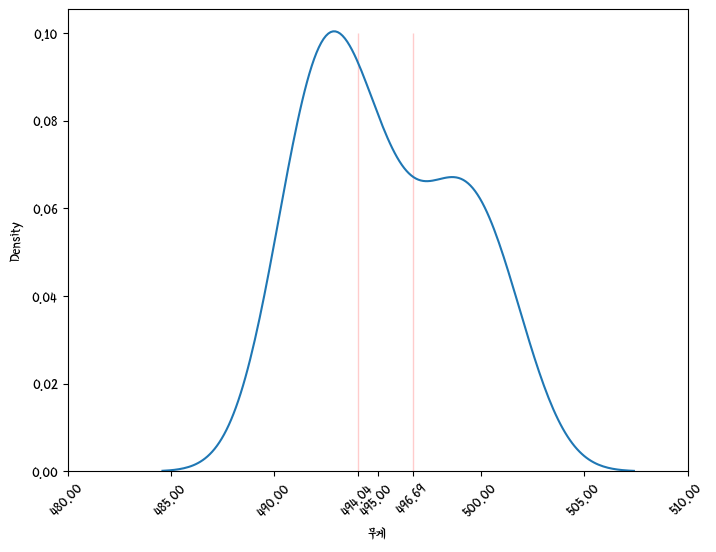

In [34]:
plt.figure()
a=sb.kdeplot(data=data["무게"])
b=sb.lineplot(x=[cmin,cmin],y=[0,0.1],color="red")
c=sb.lineplot(x=[cmax,cmax],y=[0,0.1],color="red")
plt.xticks(list(a.get_xticks())+[cmin,cmax],rotation=45)
plt.show()

### 결론

컴플레인을 걸어야하네~

In [20]:
# alternative : 대립가설을 설명하는 것임
# h0 : 빵의 평균무게가 500보다 작거나 같다 
t,p=sp.stats.ttest_1samp(data['무게'],500,alternative="greater")
print(t,p)

-7.134111017689359 0.9999999624667025


In [25]:
# h0 : 빵의 평균무게가 500보다 같다 
t,p=sp.stats.ttest_1samp(data['무게'],500)
print(t,p)

-7.134111017689359 7.506659489089533e-08


In [27]:
# h0 : 빵의 무게가 500보다 크거가 같다 None hyposis
t,p=sp.stats.ttest_1samp(data['무게'],500,alternative="less")
print(t,p)

-7.134111017689359 3.753329744544767e-08


In [17]:
print(t,p)

-7.134111017689359 3.753329744544767e-08
